# Matplotlib bar chart storytelling

In [2]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1


df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [3]:
df_quantity_brand = duckdb.query(
    """--sql
    SELECT make as Brand, 
    SUM(quantity) AS Quantity
    FROM 
        df 
    GROUP BY 
        Brand
    ORDER BY 
        Quantity DESC;
    """
).df().set_index("Brand")

df_quantity_brand

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
Secma,1.0
Martin Motors,1.0
Westfield,1.0


## Bar charts

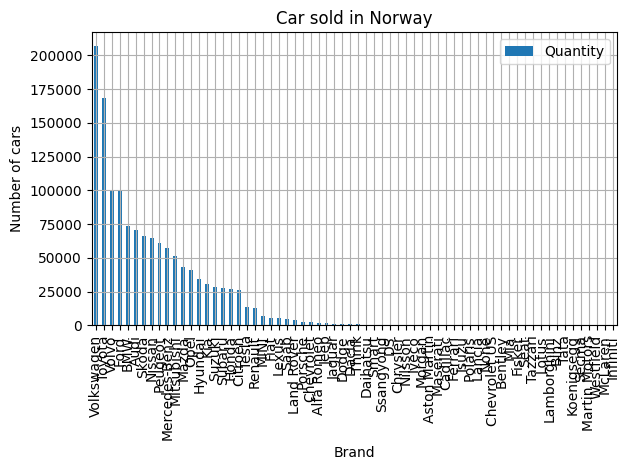

In [4]:
ax = df_quantity_brand.plot(kind= "bar", title= "Car sold in Norway", ylabel= "Number of cars")
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/0_bar_initial.png")

In [5]:
df_quantity_brand.iloc[:10]

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


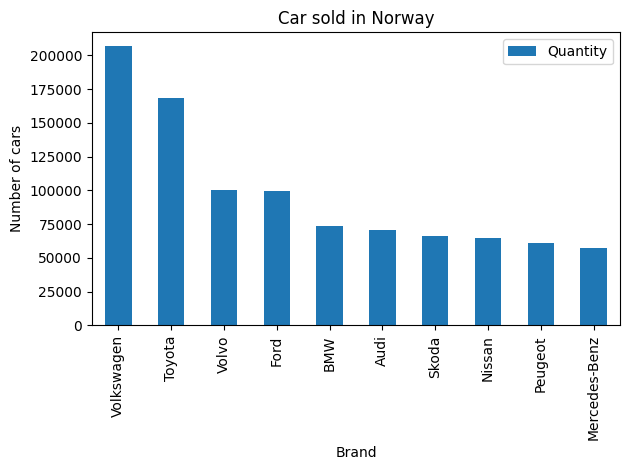

In [6]:
ax = df_quantity_brand.iloc[:10].plot(kind= "bar", title= "Car sold in Norway", ylabel= "Number of cars")



fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/1_bar_initial.png")

## apply data storytelling
- remove clutter
- contrast
- color sparingly
- description title and labels
- positioning title and labels
- proximity principle with annotate
- percentage instead pf absolute values
- horizontal bar

In [7]:
# percentage
df_percentage = df_quantity_brand["Quantity"] / df_quantity_brand["Quantity"].sum() * 100

df_percentage

Brand
Volkswagen       15.340063
Toyota           12.482984
Volvo             7.417851
Ford              7.401225
BMW               5.441826
                   ...    
Secma             0.000074
Martin Motors     0.000074
Westfield         0.000074
McLaren           0.000074
Infiniti          0.000074
Name: Quantity, Length: 66, dtype: float64

In [8]:
df_percentage_top_10 = df_percentage.iloc[:10]
colors = [GRAY_1] * len(df_percentage_top_10)  # multiplecera med lista 
colors[2] = BLUE_1
colors


['#CCCCCC',
 '#CCCCCC',
 '#1E4E5C',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

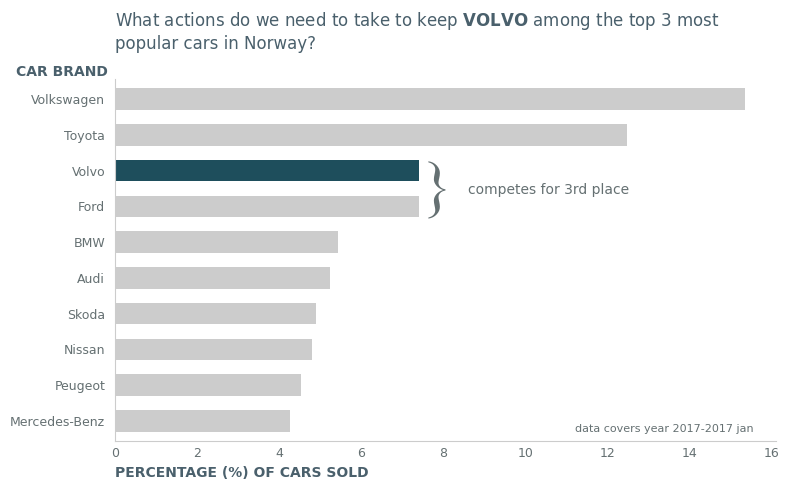

In [9]:
# Horizontal bar chart
ax = df_percentage.iloc[:10].plot(
    kind= "barh",  
    ylabel= "Number of cars", 
    figsize= (8,5), width= .6, 
    color = colors)

ax.invert_yaxis()

# remove clutter
ax.spines[["top", "right"]].set_visible(False)

# contrast
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors= GRAY_2, labelsize= 9, length= 0, pad= 5)
ax.tick_params(axis= "y", pad= 7)


# Descriptive title and labels - call to action (CTA)
ax.set_title("What actions do we need to take to keep " + r"$\bf{VOLVO}$" + " among the top 3 most \npopular cars in Norway?", # LaTex mode (r$\bf{volvo}$)
             loc= "left",
             color= GRAY_3,
             pad= 22)


ax.set_ylabel("CAR BRAND", color= GRAY_3, fontweight= "bold", rotation= 0)
ax.yaxis.set_label_coords(-0.08,1)
ax.set_xlabel("PERCENTAGE (%) OF CARS SOLD", color= GRAY_3, fontweight= "bold", loc= "left")


# annotation - proximity princible 
ax.annotate(xy= (7.5, 2.98), text= "}", fontsize= 45, color= GRAY_2, family= "Times New Roman")

ax.annotate(xy= (8.6, 2.65), text= "competes for 3rd place", fontsize= 10, color= GRAY_2)

ax.annotate(xy= (11.2, 9.3), text= "data covers year 2017-2017 jan", fontsize= 8, color= GRAY_2)



fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/2_bar_initial.png", dpi= 400)